In [56]:
model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',  # Auto-adjusts for spam/ham ratio
    C=0.8,                   # Regularization strength (tune this)
    solver='liblinear'        # Better for small datasets
)


import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("/spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']

# Step 3: Preprocessing
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return text

df['message'] = df['message'].apply(clean_text)

# Step 4: Feature extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['message'])
y = df['label']

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [28]:
print(predict_spam("Hi, are we meeting today?"))                 # Expect: Not Spam
print(predict_spam("Click to win a free cruise!"))              # Expect: Spam
print(predict_spam("Reminder: your class starts at 10 AM"))     # Expect: Not Spam
print(predict_spam("Congratulations, you've won a lottery!"))   # Expect: Spam

Not Spam
Spam
Not Spam
Not Spam


In [29]:
# 1. First, redefine the vectorizer with new parameters
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Note: proper class name and tuple syntax

# 2. Refit the vectorizer and transform the data
X = vectorizer.fit_transform(df['message'])

# 3. Redo the train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Retrain the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)  # Note: proper capitalization
model.fit(X_train, y_train)

# 5. Now you can use predict_spam() or check probabilities
msg = "Congratulations, you've won a lottery!"  # Fixed variable name (msg not mg)
vec = vectorizer.transform([clean_text(msg)])
proba = model.predict_proba(vec)
print(f"Spam Probability: {proba[0][1]:.4f}, Not Spam Probability: {proba[0][0]:.4f}")  # Fixed f-string

Spam Probability: 0.1826, Not Spam Probability: 0.8174


In [30]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9399103139013453
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       1.00      0.55      0.71       150

    accuracy                           0.94      1115
   macro avg       0.97      0.78      0.84      1115
weighted avg       0.94      0.94      0.93      1115



In [31]:
model = LogisticRegression(max_iter=1000, C=0.5, class_weight='balanced')

In [32]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000, stop_words='english')

In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.97668161 0.98026906 0.98114901 0.97307002 0.98114901]
Mean accuracy: 0.9784637431467423


In [34]:
# First ensure your vectorizer and model are properly fitted
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(df['message'])  # This fits the vectorizer

model = LogisticRegression(max_iter=1000)
model.fit(X, y)  # This fits the model

# Now get feature importance correctly
feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_[0]  # Correct attribute name

# Get top 10 spam/ham words (remove the extra colon)
top_spam_words = sorted(zip(feature_names, coefs),
                   key=lambda x: x[1], reverse=True)[:10]
top_ham_words = sorted(zip(feature_names, coefs),
                   key=lambda x: x[1])[:10]

print("Top spam words:", top_spam_words)
print("Top ham words:", top_ham_words)

Top spam words: [('call', np.float64(5.13549341342302)), ('txt', np.float64(4.5518484461736595)), ('free', np.float64(4.329933837412091)), ('to', np.float64(3.901447793934747)), ('text', np.float64(3.600649066764951)), ('stop', np.float64(3.3842320595191118)), ('mobile', np.float64(3.15313207369647)), ('www', np.float64(2.9996870147195005)), ('reply', np.float64(2.9769210391479564)), ('claim', np.float64(2.9259401870810384))]
Top ham words: [('me', np.float64(-2.386457185167437)), ('my', np.float64(-2.374534956766879)), ('ok', np.float64(-1.7820444253254881)), ('that', np.float64(-1.7457911483511745)), ('it', np.float64(-1.710651517685158)), ('but', np.float64(-1.4858248419962434)), ('ll', np.float64(-1.4316492249562793)), ('gt', np.float64(-1.4191393058349437)), ('lt', np.float64(-1.414399945328294)), ('how', np.float64(-1.3574636812929441))]


In [35]:
vectorizer.fit_transform(df['message'])  # Must be done before get_feature_names_out()
model.fit(X_train, y_train)  # Must be done before coef_

LogisticRegression(max_iter=1000)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


In [37]:
LogisticRegression(class_weight='balanced')

LogisticRegression(class_weight='balanced')

In [38]:
y_proba = model.predict_proba(X_test)[:,1]
y_pred_custom = (y_proba > 0.3).astype(int)

In [39]:
TfidfVectorizer(ngram_range=(1,3), max_features=5000)

TfidfVectorizer(max_features=5000, ngram_range=(1, 3))

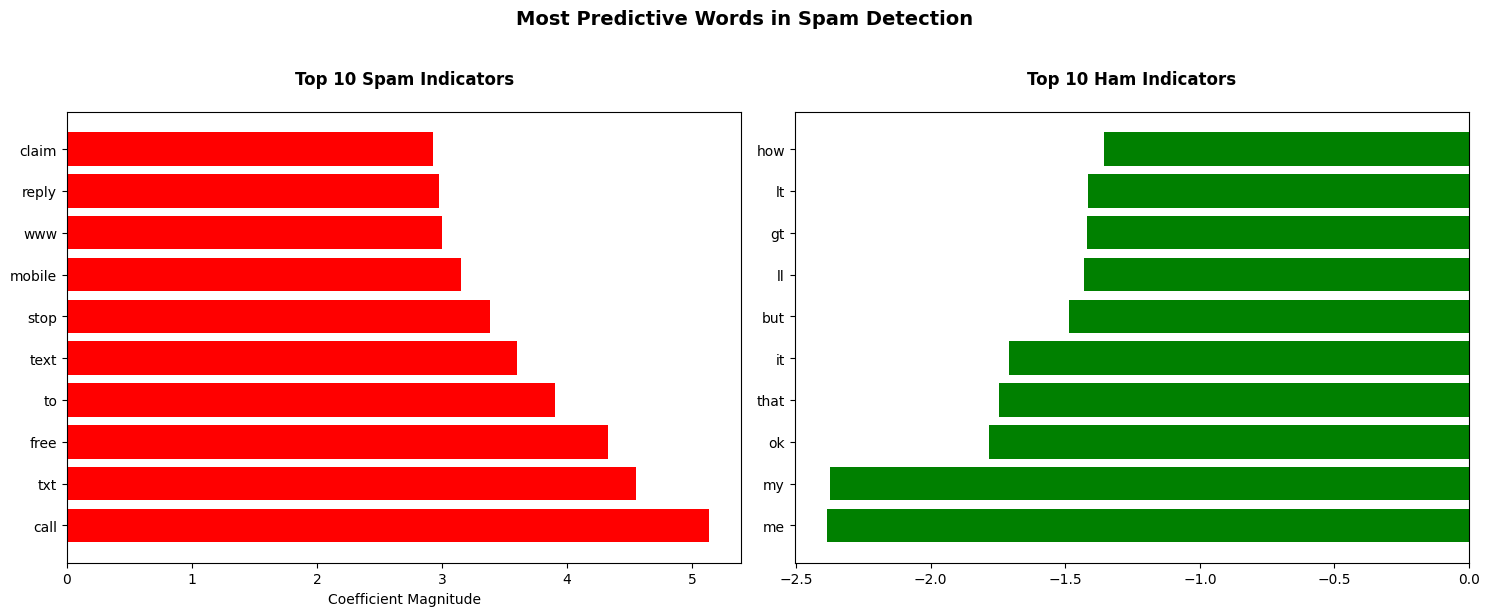

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
top_spam = sorted(zip(feature_names, coefs), key=lambda x: x[1], reverse=True)[:10]
top_ham = sorted(zip(feature_names, coefs), key=lambda x: x[1])[:10]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Spam words plot
ax1.barh([x[0] for x in top_spam], [x[1] for x in top_spam], color='red')
ax1.set_title('Top 10 Spam Indicators', pad=20, fontweight='bold')
ax1.set_xlabel('Coefficient Magnitude')

# Ham words plot
ax2.barh([x[0] for x in top_ham], [x[1] for x in top_ham], color='green')
ax2.set_title('Top 10 Ham Indicators', pad=20, fontweight='bold')

# Styling
plt.suptitle('Most Predictive Words in Spam Detection', y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

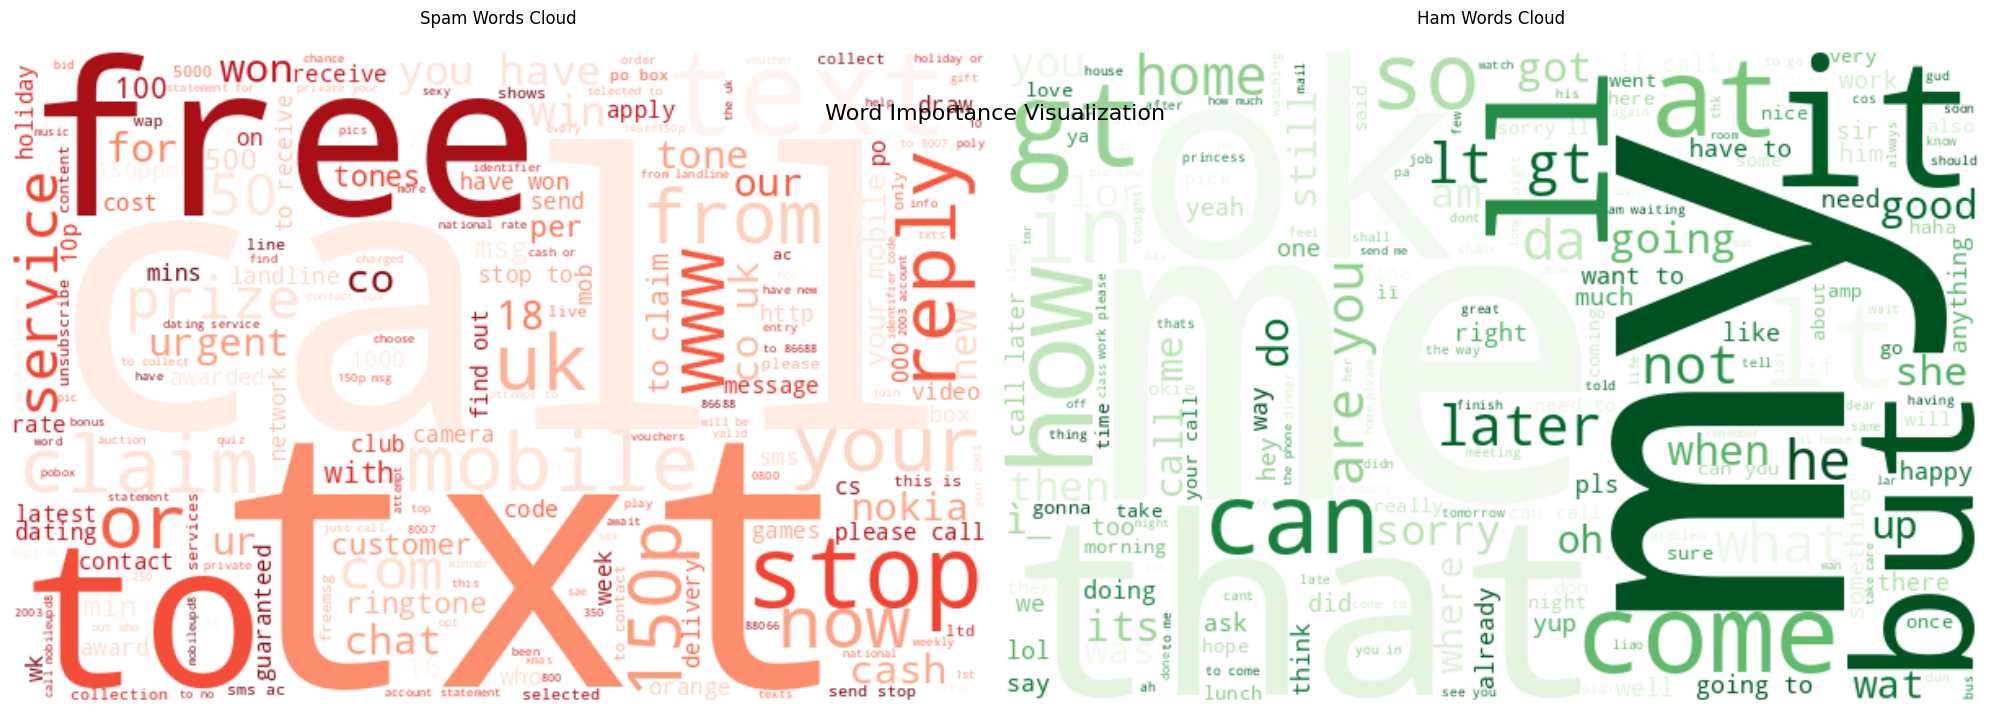

In [41]:
from wordcloud import WordCloud

# Generate word frequencies
spam_words = {word: abs(weight) for word, weight in zip(feature_names, coefs) if weight > 0}
ham_words = {word: abs(weight) for word, weight in zip(feature_names, coefs) if weight < 0}

# Create word clouds
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

wc_spam = WordCloud(width=600, height=400, background_color='white', colormap='Reds').generate_from_frequencies(spam_words)
ax1.imshow(wc_spam, interpolation='bilinear')
ax1.set_title('Spam Words Cloud', pad=20)
ax1.axis('off')

wc_ham = WordCloud(width=600, height=400, background_color='white', colormap='Greens').generate_from_frequencies(ham_words)
ax2.imshow(wc_ham, interpolation='bilinear')
ax2.set_title('Ham Words Cloud', pad=20)
ax2.axis('off')

plt.suptitle('Word Importance Visualization', y=0.82, fontsize=16)
plt.tight_layout()
plt.show()

In [45]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Find optimal threshold (maximizing F1-score)
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
optimal_threshold = thresholds[np.argmax(f1_scores)]

print(f"Optimal threshold: {optimal_threshold:.2f}")  # Likely < 0.5

# Custom predictions
y_pred_tuned = (y_proba > optimal_threshold).astype(int)
print(classification_report(y_test, y_pred_tuned))

Optimal threshold: 0.18
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       965
           1       0.90      0.88      0.89       150

    accuracy                           0.97      1115
   macro avg       0.94      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [46]:
vectorizer = TfidfVectorizer(
    ngram_range=(1, 3),      # Captures phrases like "win lottery"
    max_features=8000,       # Increase from 5000
    stop_words='english',
    analyzer='word',         # Try 'char_wb' for character n-grams
    min_df=2                 # Ignore very rare terms
)

In [49]:
# Initialize vectorizer ONCE with consistent parameters
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=5000,  # Limit features for consistency
    stop_words='english'
)

# Fit and transform ONCE
X = vectorizer.fit_transform(df['message'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
new_tests = [
    "URGENT: Your account will be closed",
    "Hi mom, what's for dinner?",
    "Claim your $1980 Melnert voucher now!",
    "Doctor's appointment confirmed for tomorrow",
    "You've been selected for a free iPhone"
]

for msg in new_tests:
    # Use the SAME vectorizer instance
    vec = vectorizer.transform([clean_text(msg)])
    proba = model.predict_proba(vec)[0]
    print(f"{msg[:30]}... -> Spam ({proba[1]:.1%}) | Prediction: {predict_spam(msg)}")

URGENT: Your account will be c... -> Spam (26.2%) | Prediction: Not Spam
Hi mom, what's for dinner?... -> Spam (1.1%) | Prediction: Not Spam
Claim your $1980 Melnert vouch... -> Spam (82.8%) | Prediction: Spam
Doctor's appointment confirmed... -> Spam (3.5%) | Prediction: Not Spam
You've been selected for a fre... -> Spam (21.7%) | Prediction: Not Spam


In [52]:
print("Training features:", X_train.shape[1])
print("Prediction features:", vectorizer.transform(["test"]).shape[1])

Training features: 5000
Prediction features: 5000


In [53]:
import joblib
joblib.dump((vectorizer, model), 'spam_detector.pkl')
vectorizer, model = joblib.load('spam_detector.pkl')